In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
data = datasets.fetch_openml(
'mnist_784',
version=1,
return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

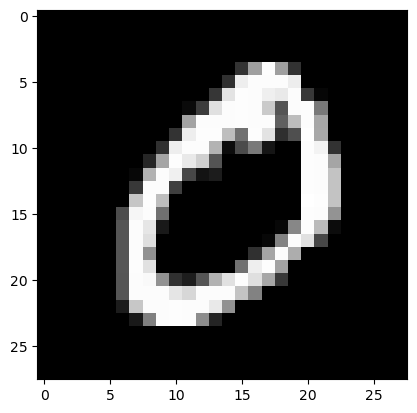

In [7]:
single_image = pixel_values.iloc[1].values.reshape(28, 28)
plt.imshow(single_image, cmap='gray')


# T-sne

1. tsne = manifold.TSNE(n_components=2, random_state=42)
You're initializing a t-SNE model from sklearn.manifold.

n_components=2 → You want to reduce the data to 2 dimensions (for visualization).

random_state=42 → For reproducibility (t-SNE is a stochastic algorithm).

Think of this as preparing the t-SNE algorithm to take your high-dimensional data and squeeze it into a 2D space.

2. pixel_values.iloc[:3000].values
This takes the first 3000 rows from your DataFrame pixel_values.

.iloc[:3000] selects those rows.

.values converts the DataFrame into a NumPy array.

Each row is one image (flattened to 784 pixels for MNIST).

Shape: (3000, 784)

3. tsne.fit_transform(...)
Applies the t-SNE algorithm to your 3000 data points.

Returns a 2D array of shape (3000, 2).

Now each image is represented by 2 coordinates (x, y) in 2D space.

t-SNE stands for t-distributed Stochastic Neighbor Embedding. It is a powerful dimensionality reduction algorithm mainly used for:

Visualizing high-dimensional data (like images, text embeddings, etc.)

Mapping data from a high-dimensional space (e.g., 784 dimensions in MNIST images) into a low-dimensional space (typically 2D or 3D)

 🧠 Good to Know

 
t-SNE is non-linear and stochastic, meaning it might give slightly different results on each run.

It’s computationally intensive, so it's often used on smaller datasets or samples (like 1,000–5,000 samples).

 💡 also PCA can be used

In [11]:
# This step creates the t-SNE transformation of the data
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values.iloc[:3000].values)

In [12]:
# We use only two components
# as we can visualize them well in a two-dimensional setting. The transformed_data,
# in this case, is an array of shape 3000x2 (3000 rows and 2 columns). A data like
# this can be converted to a pandas dataframe by calling pd.DataFrame on the array
tsne_df = pd.DataFrame(
np.column_stack((transformed_data, targets[:3000])),
columns=["x", "y", "targets"]
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [13]:
tsne_df

,x,y,targets
0,19.366867,-9.672304,5.0
1,56.428486,-1.407667,0.0
2,-0.217957,-53.345482,4.0
3,-40.599121,11.255824,1.0
4,-9.823730,-33.139687,9.0
...,...,...,...
2995,-36.020550,-25.598783,7.0
2996,51.135891,-4.326916,0.0
2997,-31.062307,-13.572803,9.0
2998,-28.675648,45.744171,1.0


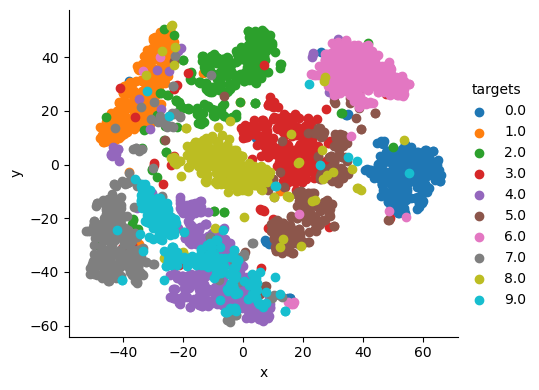

In [18]:
# adjust height and width
grid = sns.FacetGrid(tsne_df, hue="targets",height=4, aspect=1.2)
grid.map(plt.scatter, "x", "y").add_legend()